In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve


DataPath_1='./Data/Suppl_Data_FS3_Stoch_BBBm_timescRatio_1to1'
DataPath_2='./Data/Data_F3_Stoch_BBBm'
DataPath_3='./Data/Suppl_Data_FS3_Stoch_BBBm_timescRatio_1to20'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath_1):
    os.makedirs(DataPath_1)
if not os.path.isfile(DataPath_1+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS3_Stoch_BBBm_timescRatio_1to1.ipynb
if not os.path.isdir(DataPath_2):
    os.makedirs(DataPath_2)
if not os.path.isfile(DataPath_2+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Stoch_BBBm.ipynb
if not os.path.isdir(DataPath_3):
    os.makedirs(DataPath_3)
if not os.path.isfile(DataPath_3+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS3_Stoch_BBBm_timescRatio_1to20.ipynb

  0%|          | 0/30 [00:00<?, ?it/s]

Data not found. Running Data Generation script


  0%|          | 0/30 [00:00<?, ?it/s]

Data not found. Running Data Generation script


100%|██████████| 30/30 [00:31<00:00,  1.05s/it]


In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_5examples = [viridis(0.0)[0:3],viridis(0.3)[0:3],viridis(0.55)[0:3],viridis(0.75)[0:3],viridis(0.95)[0:3]]
alpha_value=0.45
marker_sizer=2.5
dt_vis=30


h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

In [4]:
##### Calculating latent period duration for 4 simulated intensities: matched input intensity; decreased via lowering concentration; decreased via shortening; increased via prolongation #####
N=30

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_sim=day_first_seiz
LP_mean_TR1t1=np.mean(day_first_seiz)   
LP_sem_TR1t1=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simdec=day_first_seiz
LP_mean_TR1t10=np.mean(day_first_seiz)   
LP_sem_TR1t10=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_3+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simshort=day_first_seiz
LP_mean_TR1t20=np.mean(day_first_seiz)   
LP_sem_TR1t20=np.std(day_first_seiz)/np.sqrt(N)

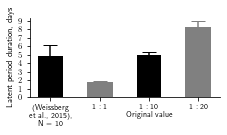

In [5]:
data = load_animal_model_data('Weissberg_et_al_2015')

fig, ax = plt.subplots()

vec=np.array([1,3])
plt.bar(np.array(vec),np.array([data['LatentPeriod_mean'],LP_mean_TR1t10]), color='black',
       yerr=[data['LatentPeriod_sem'], LP_sem_TR1t10],
       align='center',
       alpha=1,
       ecolor='black',
       capsize=10/3*2, width=0.75/3*2)
vec=np.array([2,4])
plt.bar(np.array(vec),np.array([ LP_mean_TR1t1, LP_mean_TR1t20]), color='grey',
       yerr=[LP_sem_TR1t1, LP_sem_TR1t20],
       align='center',
       alpha=1,
       ecolor='grey',
       capsize=10/3*2, width=0.8/3*2)

vec=np.array([1,2,3,4])
plt.xticks(np.array(vec), ['(Weissberg \n et al., 2015),\n N = 10',
                             r"1~:~1",
                             r"1~:~10" "\n Original value",
                             r"1~:~20"], fontsize=7.5)

plt.yticks(np.arange(0,10))
plt.ylabel('Latent period duration, days')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(3/5*4*w,w)
fig.savefig('./Figures/Supplementary/Fig_S3.pdf')